In [4]:
from PyHugeGraph import PyHugeGraphClient
from helper.insert_data import insert_data
from helper.delete_data import delete_data
from helper.update_data import update_data
from helper.traversers import traversers
from helper.read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

from helper import get_vertices_number

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000'] #, 'node_10000', 'node_100000', 'node_1000000']

In [5]:
def plot(title, x_labels, X_axis, time, option="vertices"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")

    plt.legend()

def compare_total_times(time):
    pass

In [6]:
def execute_database(database, large=True):
    hg = PyHugeGraphClient.HugeGraphClient("http://localhost", "8081", database)
    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()
    time = []

    if not large:
        time.append(insert_data.insert_data(lines, hg))
        time.append(update_data.update_data(hg, vertices))
        time.append(update_data.update_gremlin(database, vertices))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(read_data.read_gremlin(database, vertices, True))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250))
        time.append(delete_data.delete_gremlin_alltogether(database, vertices))
            
        x_labels = ["insert", "update", "upd_gremlin", "batch_upd", "read", "rd_gremlin", "delete", "batch_insert", "del_gremlin"]
    else:
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices")
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges")

    if not large:
        x_labels = ["insert", "batch insert"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[0], time[7]]
        plot("Insert times on " + database + ": Vertices", x_labels, X_axis, data, "vertices")
        plot("Insert times on " + database + ": Edges", x_labels, X_axis, data, "edges")

        x_labels = ["read", "rd_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[4], time[5]]
        plot("Read times on " + database + ": Vertices", x_labels, X_axis, data, "vertices")
        plot("Read times on " + database + ": Edges", x_labels, X_axis, data, "edges")

        x_labels = ["update", "upd_gremlin", "batch_upd"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[1], time[2], time[3]]
        plot("Update times on " + database + ": Vertices", x_labels, X_axis, data, "vertices")
        plot("Update times on " + database + ": Edges", x_labels, X_axis, data, "edges")

        x_labels = ["delete", "batch_insert", "del_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[6], time[7], time[8]]
        plot("Delete times on " + database + ": Vertices", x_labels, X_axis, data, "vertices")
        plot("Delete times on " + database + ": Edges", x_labels, X_axis, data, "edges")
    
    plt.show()
    if not large:
        return {
            "insert": time[0],
            "update_insert": time[1],
            "update_gremlin": time[2],
            "batch_update": time[3],
            "read": time[4],
            "read_gremlin": time[5],
            "delete": time[6],
            "batch_insert": time[7],
            "delete_gremlin": time[8],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 141.91it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 263.35it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 21.18it/s]


{'requestId': 'bc96ae11-1284-49d8-996f-6672f102348a', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


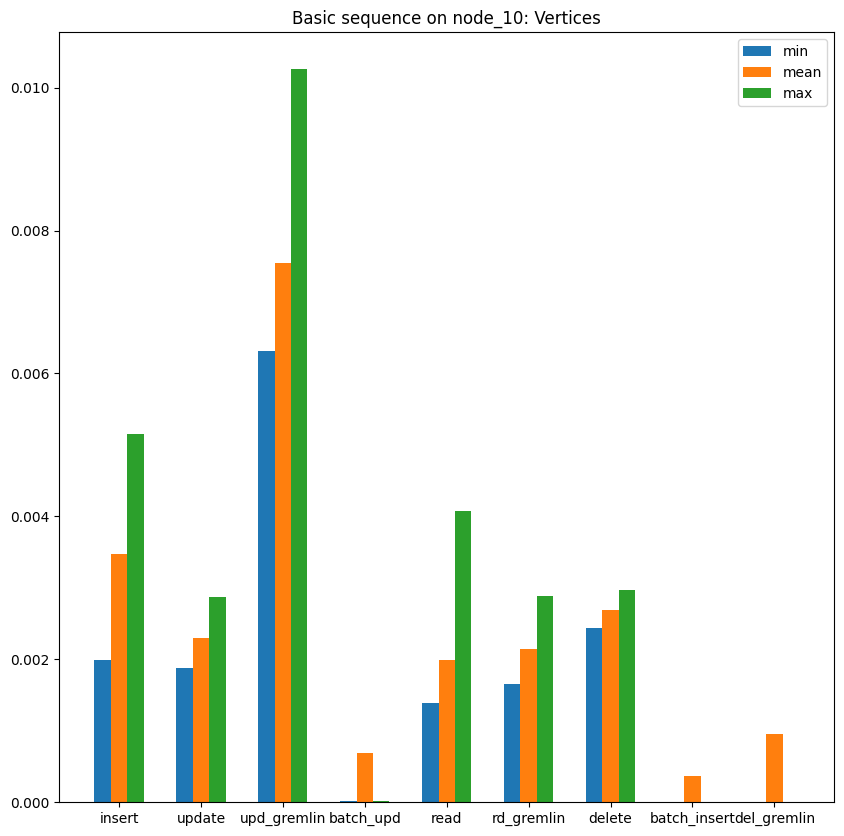

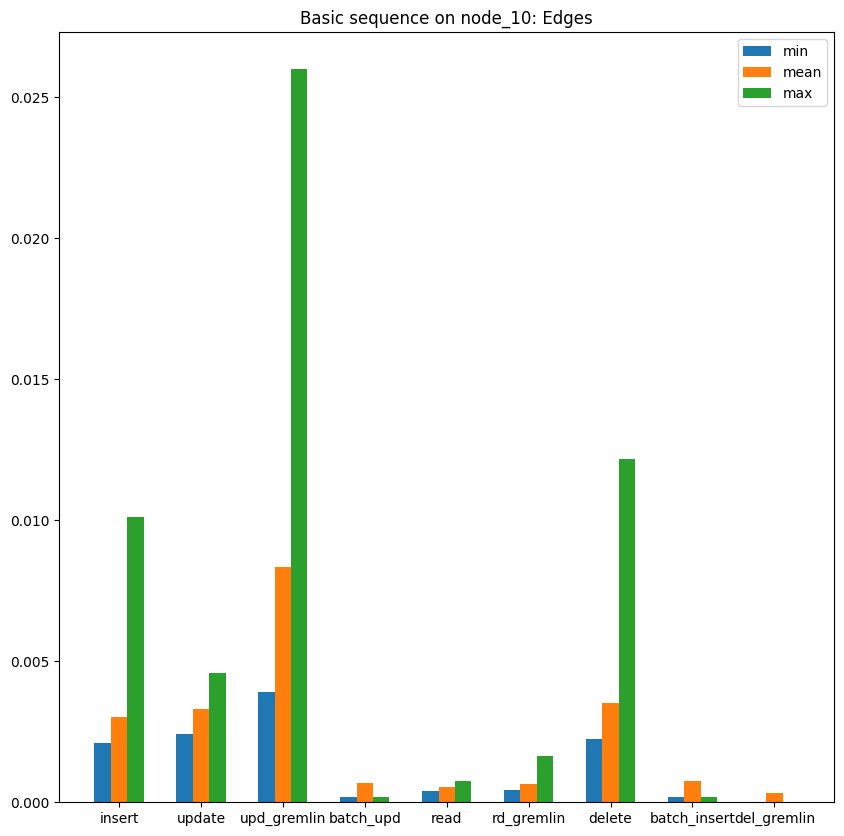

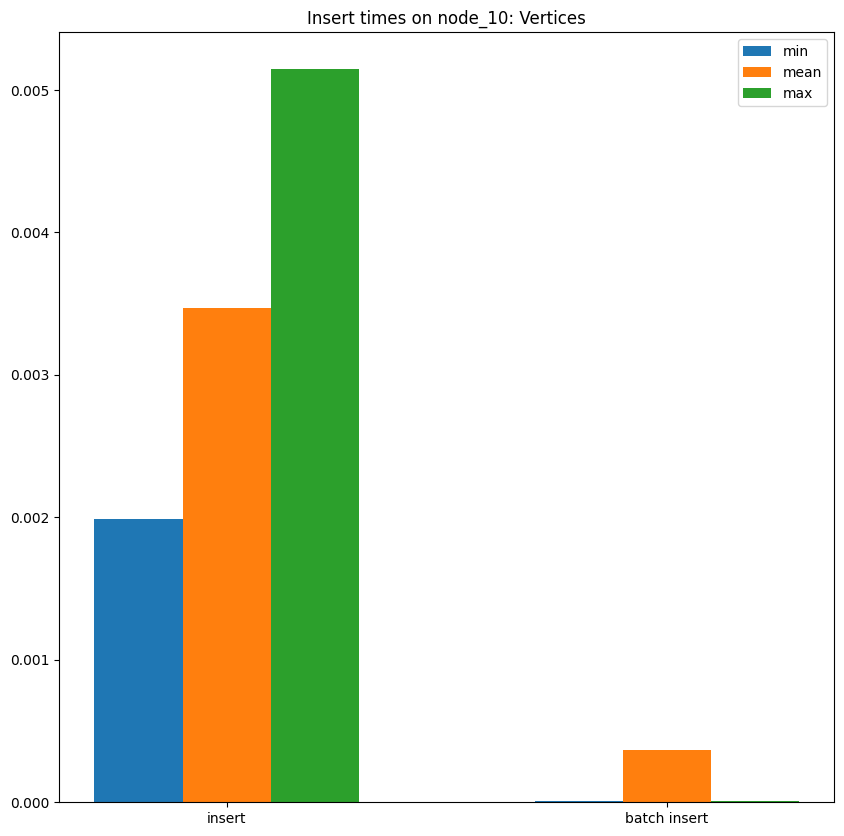

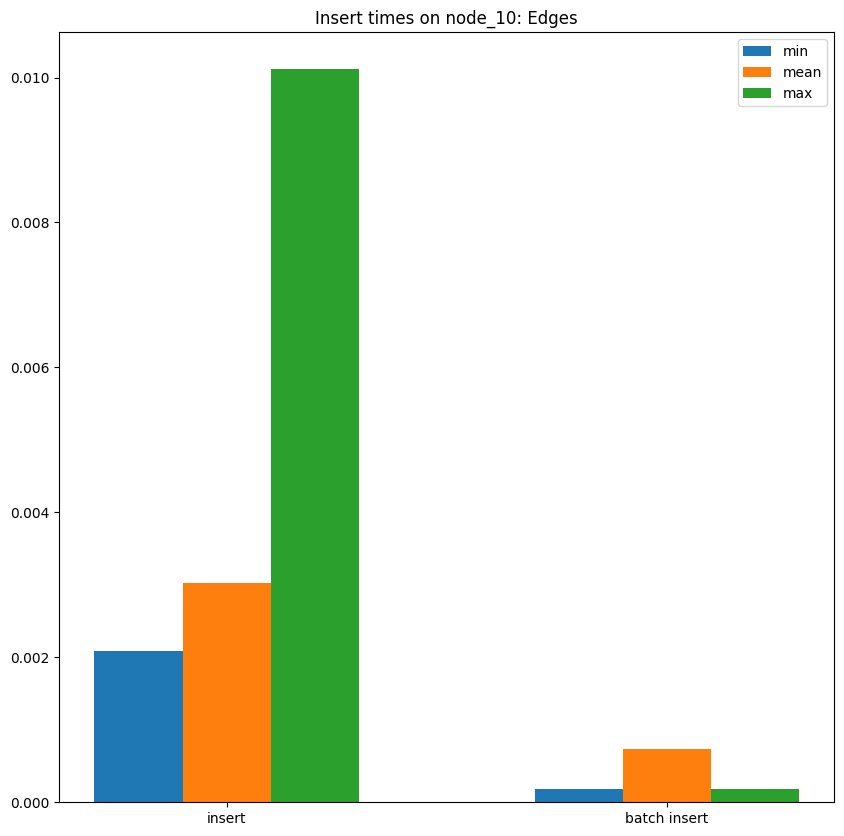

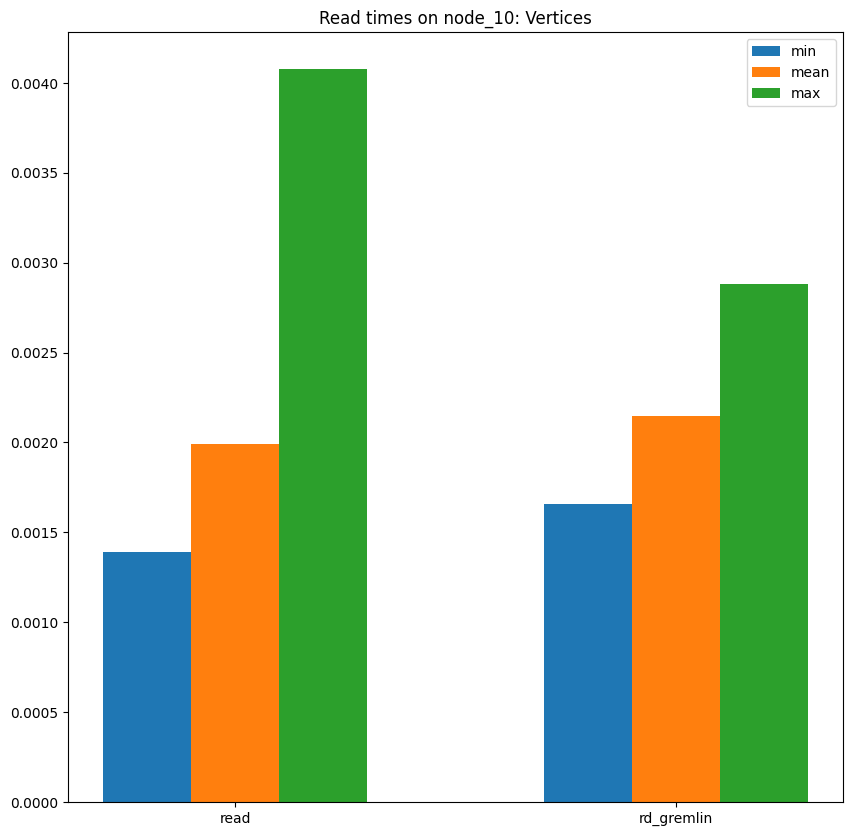

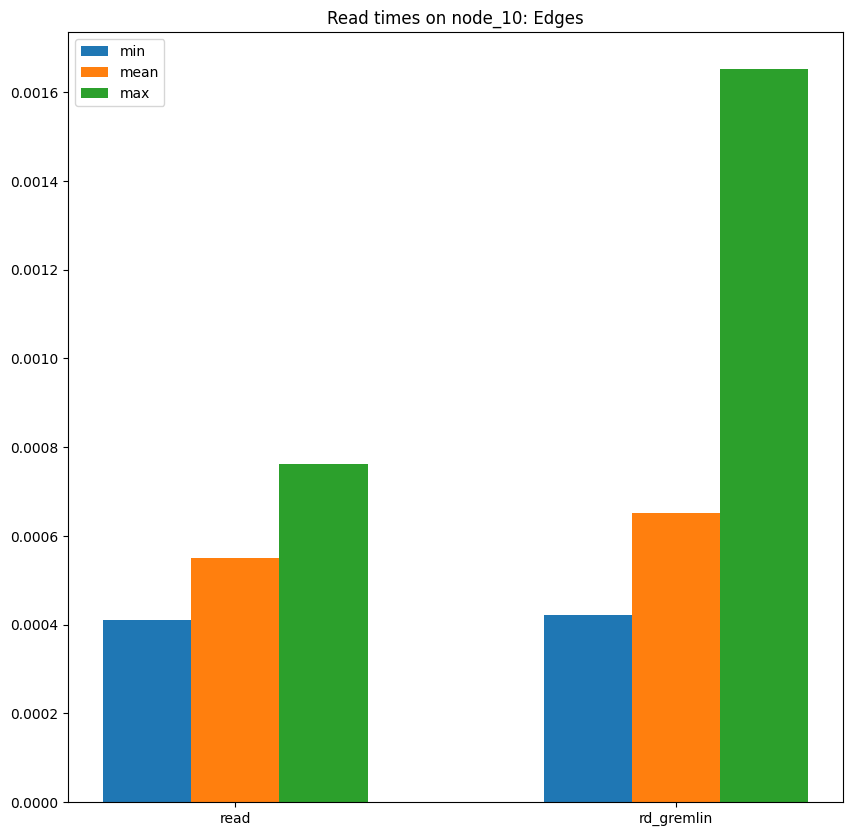

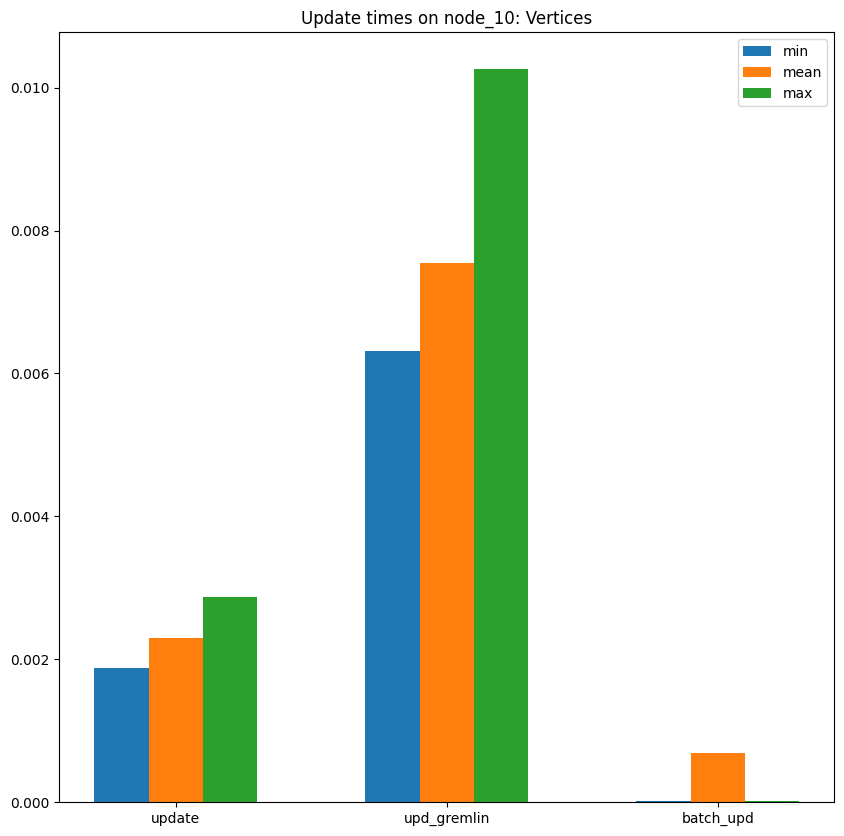

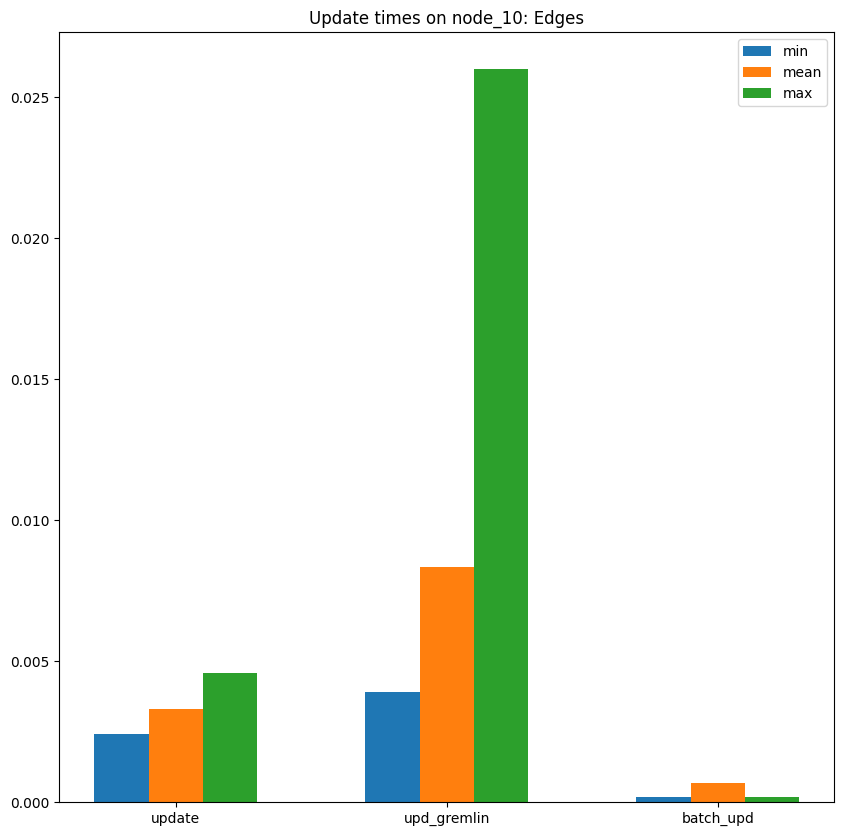

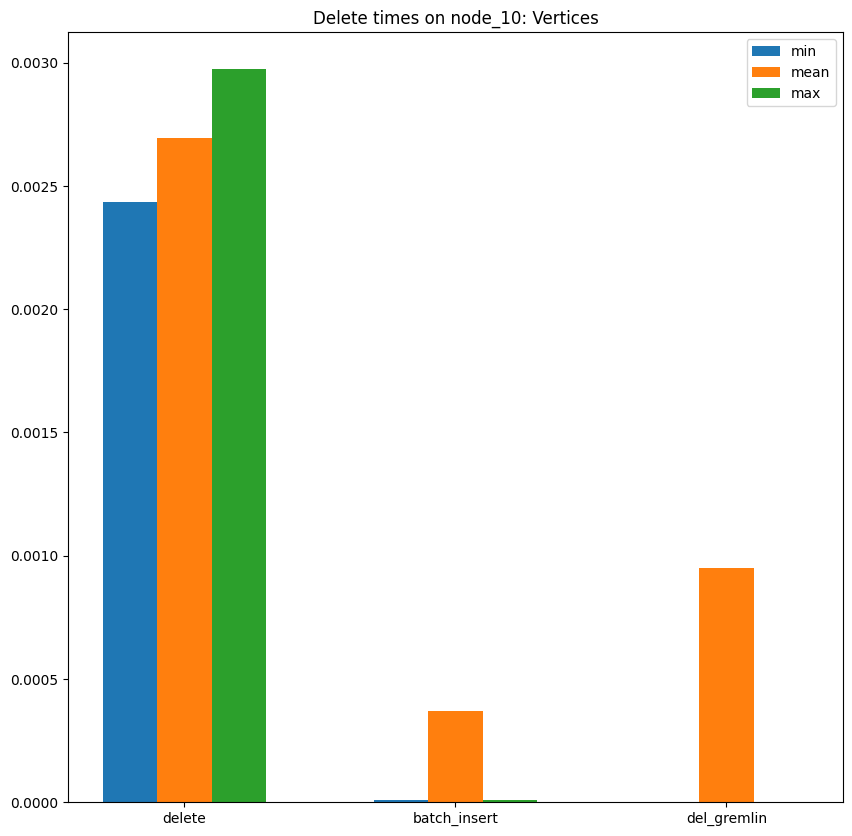

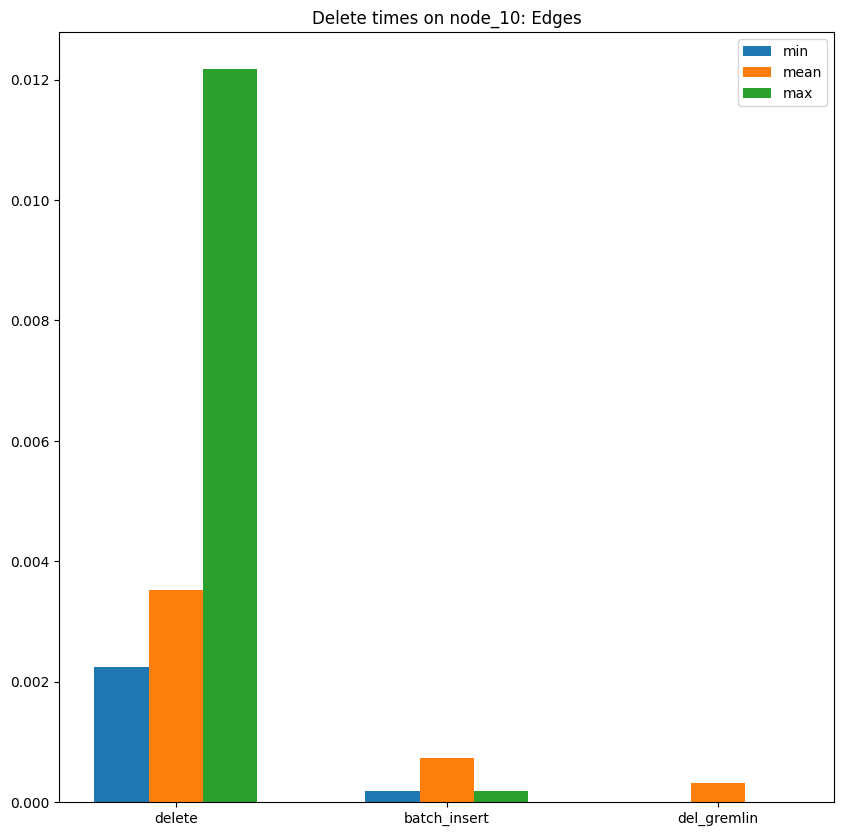

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 83.91it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 80.94it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 15.51it/s]


{'requestId': '405fe263-fa4b-4686-a85c-ff1b4569d977', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


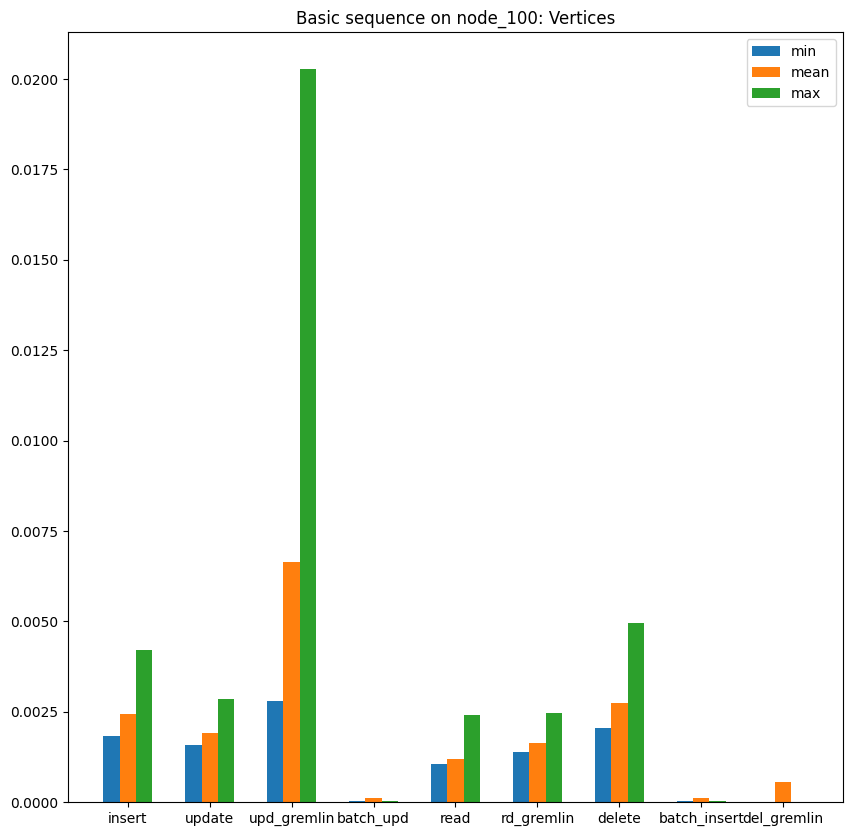

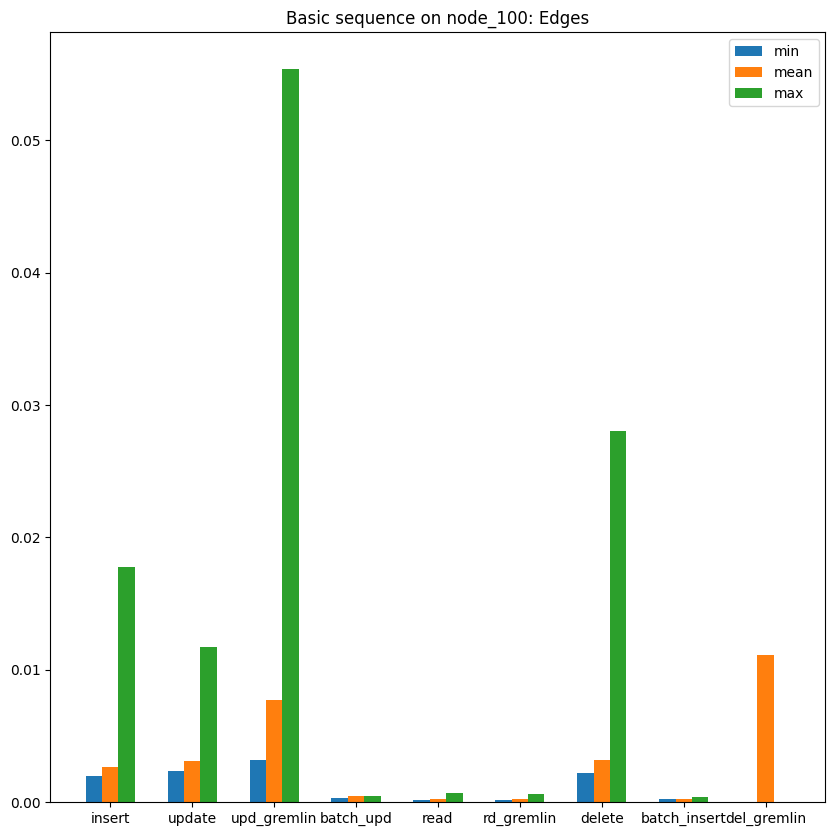

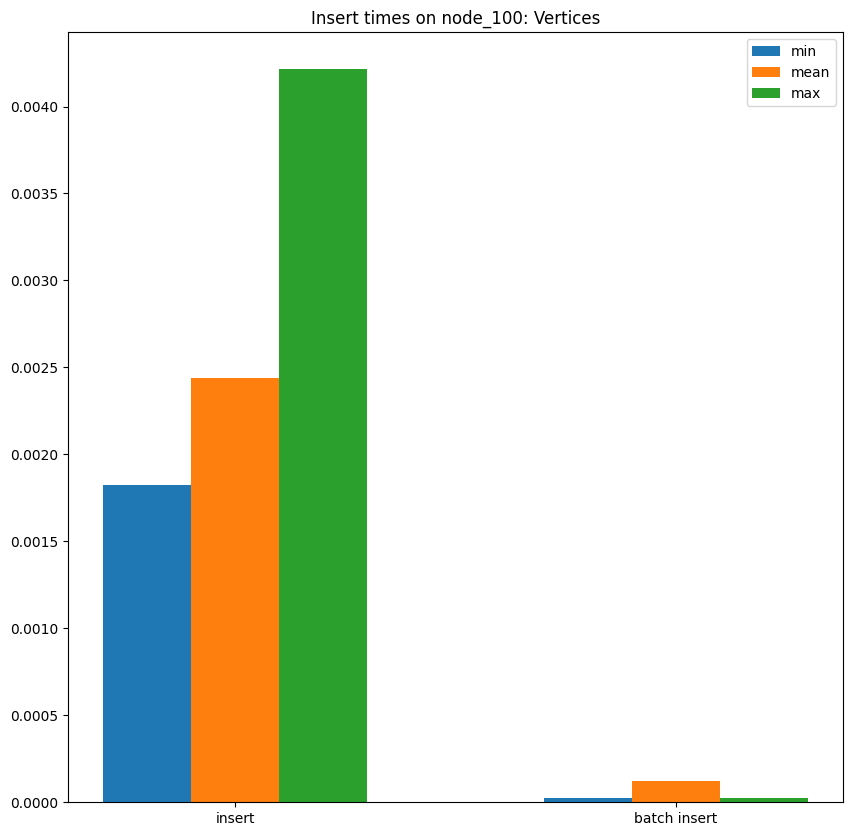

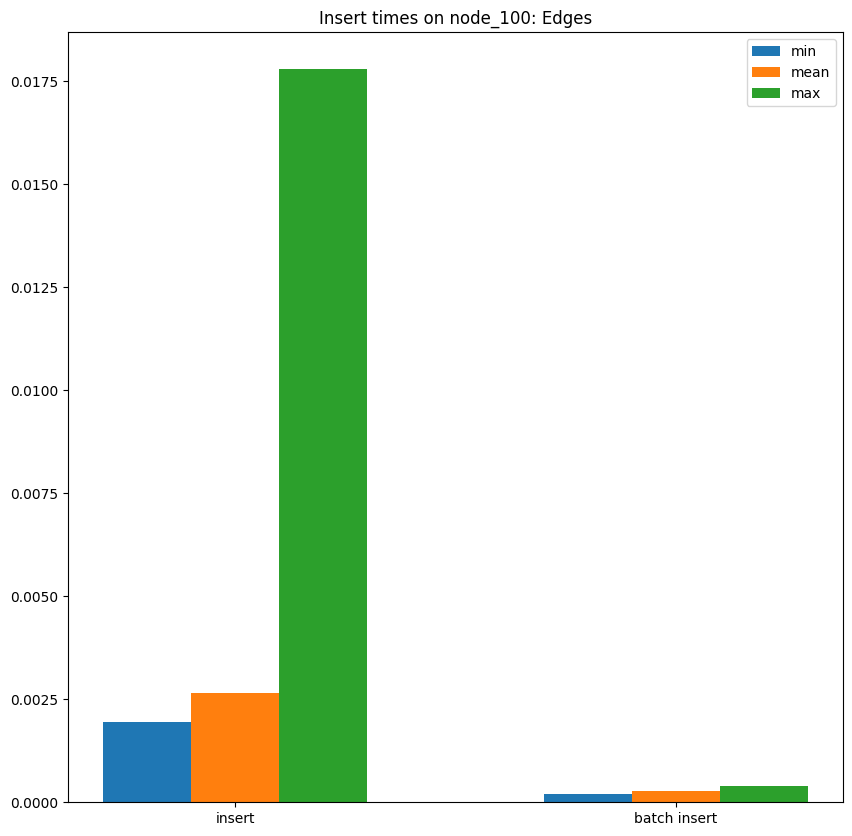

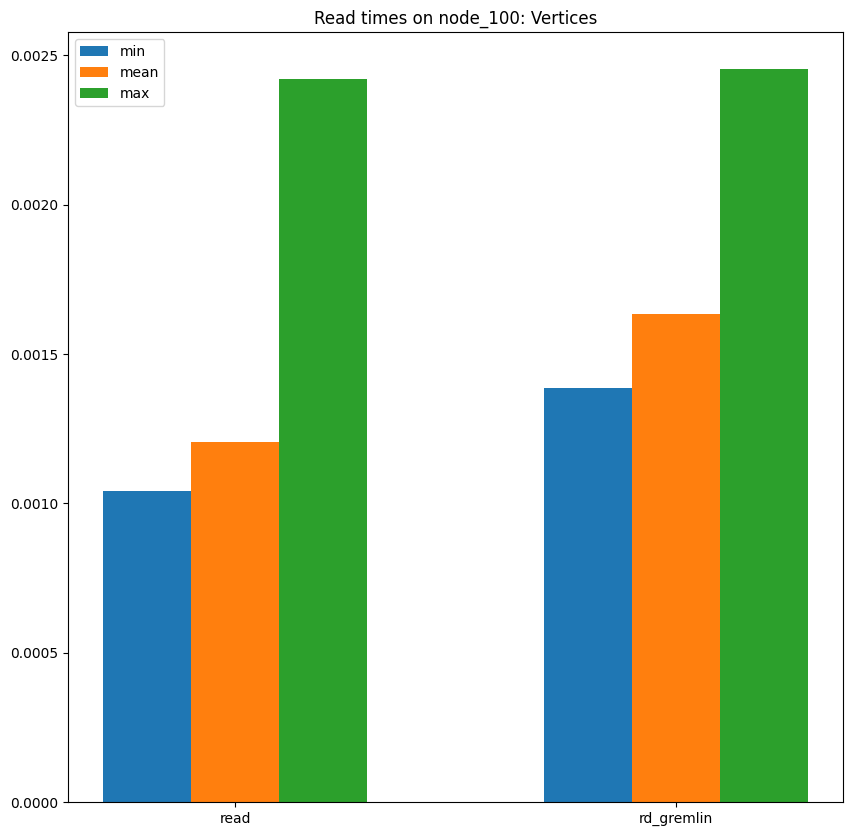

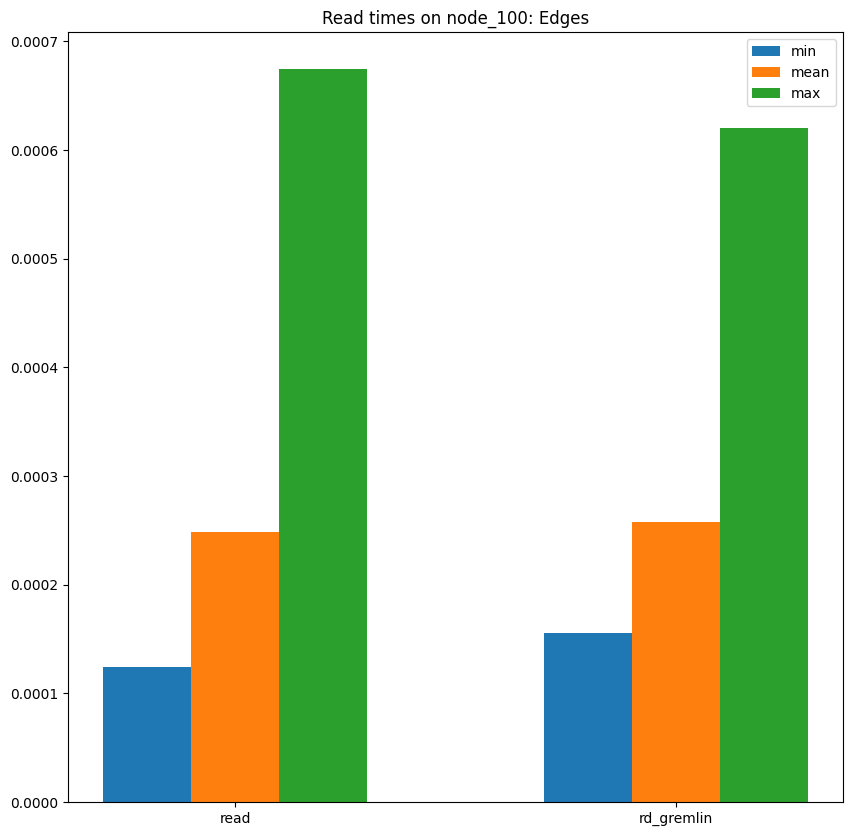

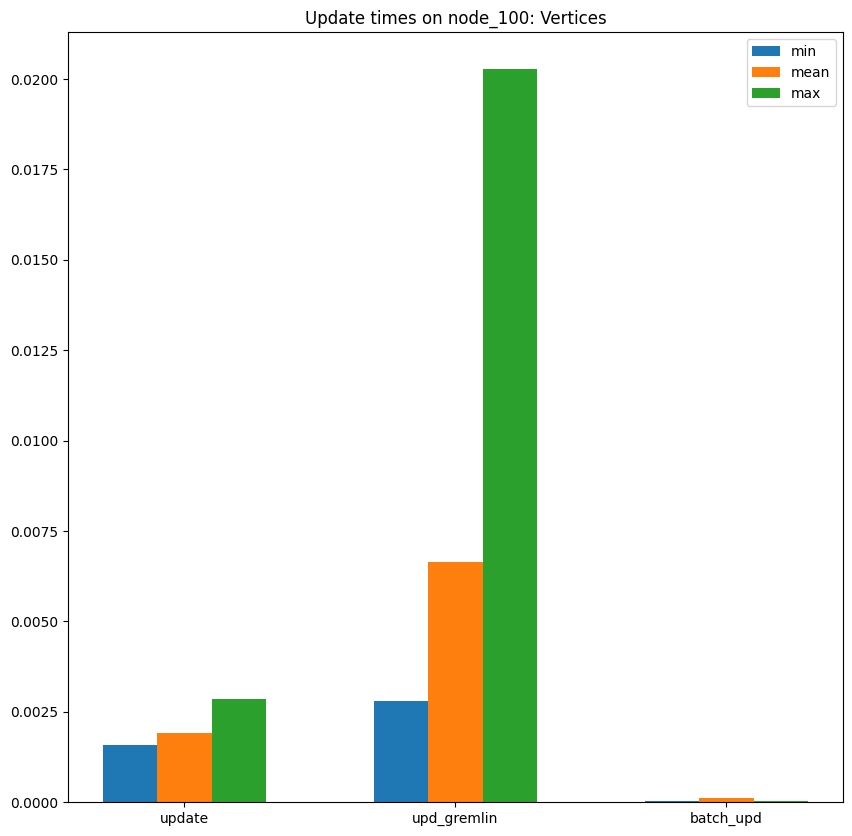

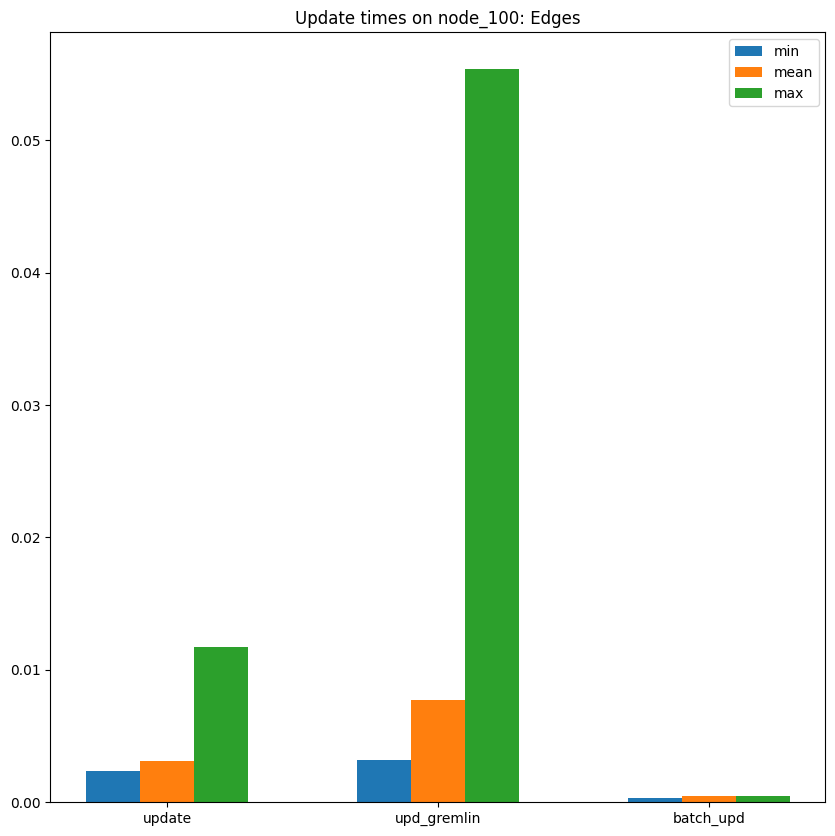

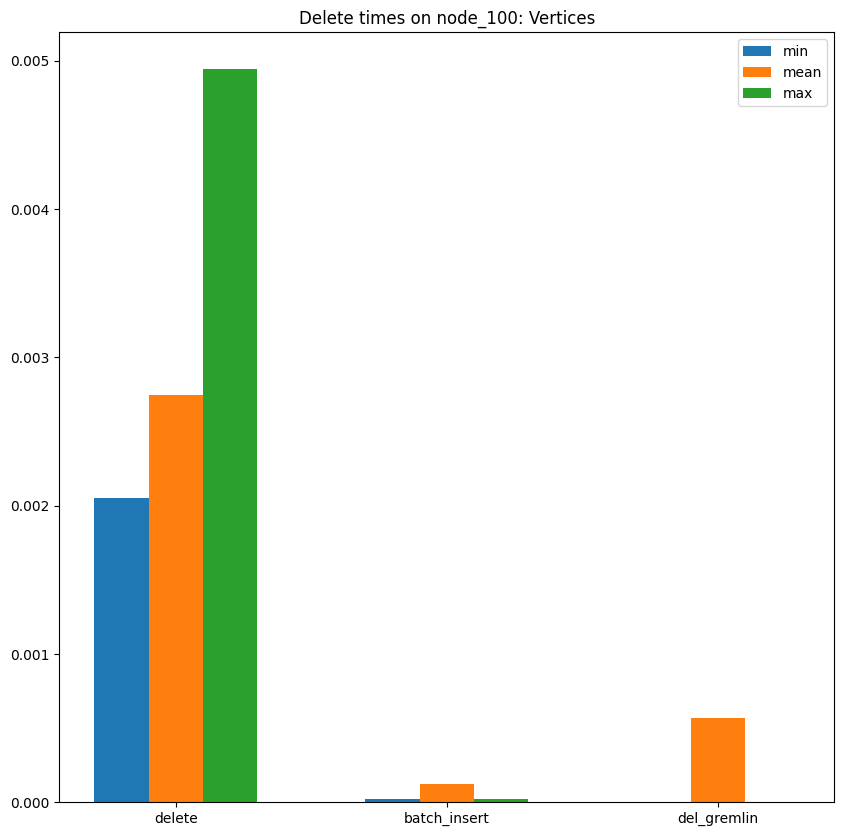

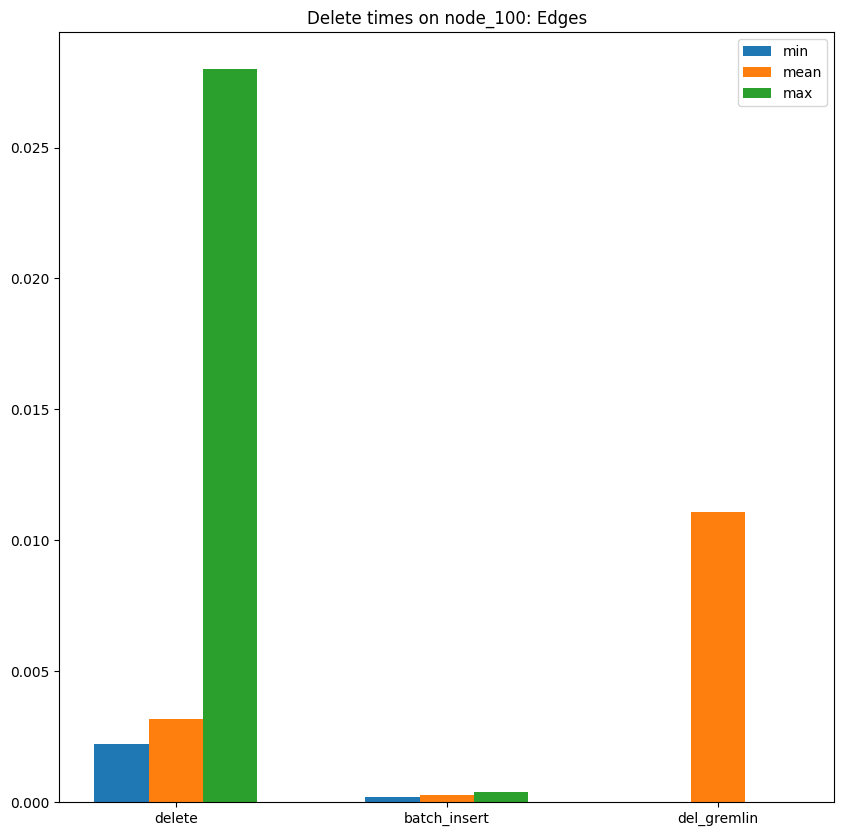

tqdm() Progress Bar: 100%|██████████| 2/2 [00:00<00:00, 15.03it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 481/481 [00:53<00:00,  9.05it/s]


AssertionError: Could not read vertex 1.

In [7]:
results = {}
large = False
for db in databases:
    if db == "node_1000":
        large = True
    results[db] = execute_database(db, large)

In [8]:
results

{'node_10': {'insert': {'vertices': {'mean': 0.003472900390625,
    'max': 0.005147457122802734,
    'min': 0.0019898414611816406,
    'number_of_vertices': 10},
   'edges': {'mean': 0.0030318180720011394,
    'max': 0.010118484497070312,
    'min': 0.0020885467529296875,
    'number_of_edges': 60},
   'total_time': 0.2171611785888672},
  'update_insert': {'edges': {'mean': 0.0033187468846639,
    'max': 0.0045664310455322266,
    'min': 0.002419710159301758,
    'total_time': 0.228562593460083},
   'vertices': {'mean': 0.0022956132888793945,
    'max': 0.002874135971069336,
    'min': 0.0018742084503173828,
    'total_time': 0.02302408218383789}},
  'update_gremlin': {'edges': {'edges_updated': 60,
    'min': 0.0039038658142089844,
    'max': 0.02600407600402832,
    'mean': 0.008324261506398518,
    'total_time': 0.5455629825592041},
   'vertices': {'min': 0.006306648254394531,
    'max': 0.01026296615600586,
    'mean': 0.007542324066162109,
    'total_time': 0.07552170753479004}},
